In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rsome import ro 
import rsome as rso                           # import the ro module
from rsome import grb_solver as grb
from torch.utils.data import DataLoader, TensorDataset
import sbibm
import model

In [2]:
import networkx as nx

G = nx.grid_2d_graph(5, 5).to_directed()
A = nx.incidence_matrix(G, oriented=True).todense()

In [3]:
weights = {e : np.random.random() for e in G.edges}
nx.set_edge_attributes(G, weights, name = 'weight')

In [4]:
b = np.zeros(len(G.nodes)) # b entries: 1 for source, -1 for target, 0 o.w.
b[0] = -1
b[-1] = 1 

In [5]:
model = ro.Model()

w = model.dvar(len(G.edges))
c = np.array(list(nx.get_edge_attributes(G, 'weight').values()))

model.min(c @ w)
model.st(w <= 1)
model.st(w >= 0)
model.st(A @ w == b)

model.solve(grb)

Restricted license - for non-production use only - expires 2024-10-28
Being solved by Gurobi...


Solution status: 2
Running time: 0.0013s


In [6]:
nx_path_length = nx.shortest_path_length(G, source=(0,0), target=(4,4), weight="weight")
lp_path_length = model.get()

print(f"nx_path_length = {nx_path_length}")
print(f"lp_path_length = {lp_path_length}")

nx_path_length = 2.428663789917535
lp_path_length = 2.428663789917535


3.185384885650714


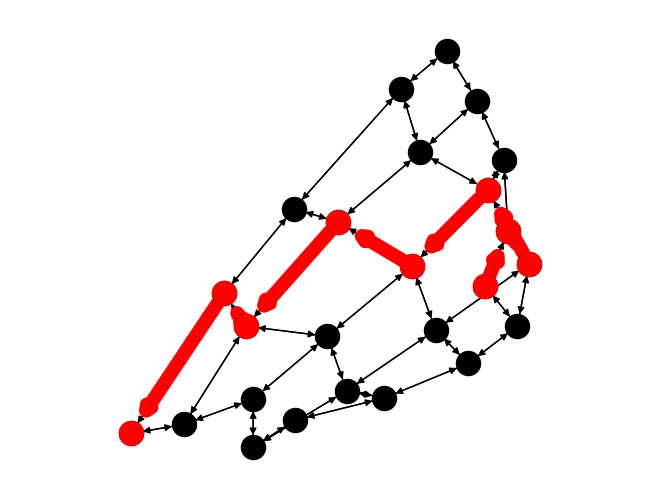

In [5]:
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color='k')

path_length = nx.shortest_path_length(G, source=(0,0), target=(4,4), weight="weight")
print(path_length)

path = nx.shortest_path(G, source=(0,0), target=(4,4), weight="weight")
shortest_path_edges = list(zip(path, path[1:]))

nx.draw_networkx_nodes(G, pos, nodelist=path,node_color='r')
nx.draw_networkx_edges(G, pos, edgelist=shortest_path_edges,edge_color='r',width=10)

plt.axis('equal')
plt.show()